
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import featuretools as ft
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Загрузка данных

In [76]:
df = pd.read_csv('sales.csv')
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [59]:
df['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [60]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

##### Зависимость между SalePrice и GrLivArea

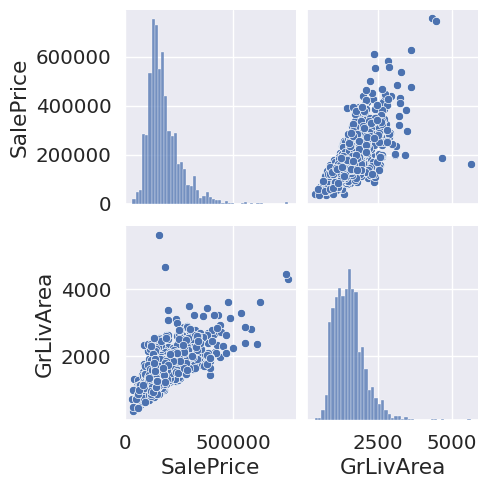

In [61]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.pairplot(df[['SalePrice', 'GrLivArea']])

##### Зависимость между SalePrice и GarageArea

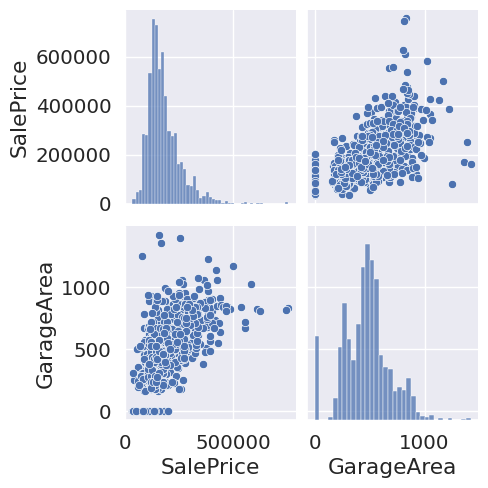

In [62]:
sns.pairplot(df[['SalePrice', 'GarageArea']])

##### Зависимость между SalePrice и OverallQual

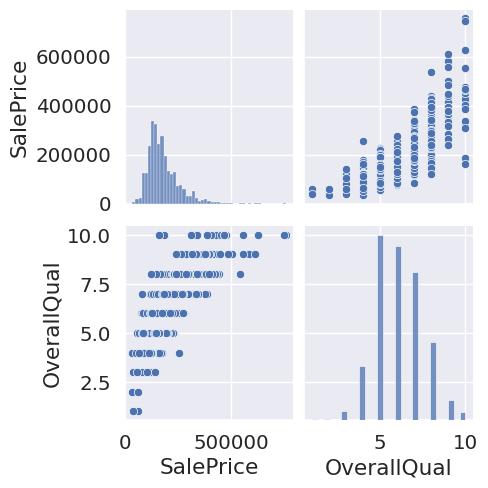

In [63]:
sns.pairplot(df[['SalePrice', 'OverallQual']])

Корреляции

In [64]:
df[['SalePrice', 'GarageArea', 'OverallQual', 'GrLivArea']].corr()

,SalePrice,GarageArea,OverallQual,GrLivArea
SalePrice,1.000000,0.623431,0.790982,0.708624
GarageArea,0.623431,1.000000,0.562022,0.468997
OverallQual,0.790982,0.562022,1.000000,0.593007
GrLivArea,0.708624,0.468997,0.593007,1.000000


##### Выводы

Между числовыми переменными и целевой переменной есть линейная связь

Подумайте, можно ли здесь создать дополнительные переменные из имеющихся?
Ответ: можно создать переменную "GarageArea/GrLivArea", можно попробовать взять от числовых переменных логарифм(попробовал, результат не изменился). А вообще у меня с этим проблемы

#### Кодирование категориальных признаков

In [72]:
new_df = pd.get_dummies(data=df, columns=['SaleCondition', 'Street', 'OverallQual'])
new_df

,SalePrice,GrLivArea,GarageArea,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,208500,1710,548,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,181500,1262,460,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,223500,1786,608,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,140000,1717,642,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,250000,2198,836,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1456,210000,2073,500,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1457,266500,2340,252,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1458,142125,1078,240,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### 4. Разделение на обучающую и тестовую выборки

In [78]:
x = new_df.drop(['SalePrice'], axis=1)
y = new_df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [79]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### 6. Получение предсказаний для обучающей и тестовой выборок

In [80]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [81]:
coef = list(zip(lr.feature_names_in_, lr.coef_))
coef

[('GrLivArea', 43.35998223344848),
 ('GarageArea', 59.42672217403231),
 ('SaleCondition_Abnorml', -11969.003534945357),
 ('SaleCondition_AdjLand', -7048.534755258609),
 ('SaleCondition_Alloca', 24220.635906527215),
 ('SaleCondition_Family', -19607.838121553126),
 ('SaleCondition_Normal', -2606.0779228726246),
 ('SaleCondition_Partial', 17010.818428102717),
 ('Street_Grvl', 8085.060626249453),
 ('Street_Pave', -8085.060626249462),
 ('OverallQual_1', -70411.03521647843),
 ('OverallQual_2', -67331.85208703624),
 ('OverallQual_3', -71646.38171268416),
 ('OverallQual_4', -52196.67921323433),
 ('OverallQual_5', -37379.48187209352),
 ('OverallQual_6', -20873.688829543364),
 ('OverallQual_7', 4757.261663589447),
 ('OverallQual_8', 51619.754663538486),
 ('OverallQual_9', 124285.64121973311),
 ('OverallQual_10', 139176.4613842089)]

In [82]:
print(f"смещение обученной модели = {lr.intercept_}")

смещение обученной модели = 104412.34476309577


### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [83]:
print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')

MAE train = 24082.89010498705
MAE test = 24193.327112170853


In [84]:
print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')

MSE train = 1418006227.1510973
MSE test = 1292051436.8121946


In [85]:
scatter_df = pd.DataFrame(data={'pred_price': pred_test, 'price': y_test})
scatter_df['pred_price'] = scatter_df['pred_price'].astype(int)
scatter_df

,pred_price,price
892,134844,154500
1105,301342,325000
413,122309,115000
522,169957,159000
1036,342447,315500
...,...,...
331,120433,139000
323,85576,126175
650,204070,205950
439,156083,110000


<Axes: >

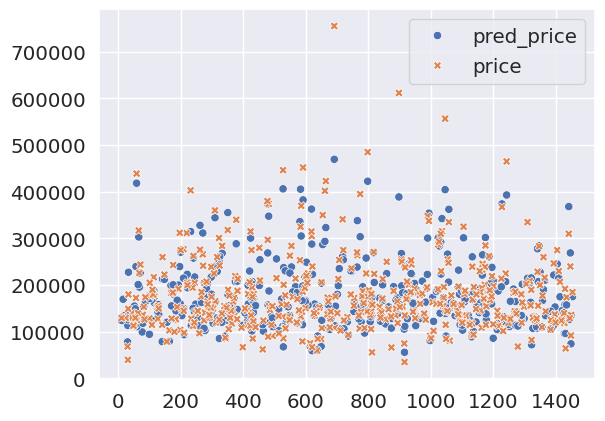

In [86]:
sns.scatterplot(data=scatter_df)

#### Заполнил 0 GarageArea 25% и снова обучил модель

In [66]:
copy_df = new_df.copy()

In [67]:
copy_df.loc[copy_df['GarageArea'] == 0, 'GarageArea'] = copy_df['GarageArea'].quantile(0.25)

/tmp/ipykernel_178000/2922928057.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '334.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  copy_df.loc[copy_df['GarageArea'] == 0, 'GarageArea'] = copy_df['GarageArea'].quantile(0.25)


In [68]:
copy_df['GarageArea'].describe()

count    1460.000000
mean      491.538014
std       184.425317
min       160.000000
25%       335.625000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [90]:
x = copy_df.drop(['SalePrice'], axis=1)
y = copy_df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [91]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [92]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [93]:
print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')

MAE train = 24348.03254103639
MAE test = 24332.959806269937


In [94]:
print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')

MSE train = 1436534136.4643447
MSE test = 1291851819.360234


Выводы: модель не переобучена, отсутствуют значимые различия между значениями метрик на обучающей и тестовой выборке

### Обучение модели линейной регрессии с новыми признаками

In [ ]:
# ft.primitives.list_primitives()[:40]
ft.primitives.get_aggregation_primitives()

In [ ]:
es = ft.EntitySet(id="price_data")
es = es.add_dataframe(
    dataframe_name="price_df",
    dataframe=df[['GarageArea', 'OverallQual', 'GrLivArea']],
    index="index",

)
es["price_df"].ww.schema



feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="price_df",
    trans_primitives=['multiply_numeric'],
    max_depth=3,
)
new_columns = feature_matrix.columns
feature_matrix

In [77]:
df['GrLivArea/GrLivArea_mean'] = df['GrLivArea'].apply(lambda x: x / df['GrLivArea'].mean())
df['GrLivArea/OverallQual'] = df['GrLivArea'] / df['OverallQual']
df['GarageArea/GarageArea_mean'] = df['GarageArea'].apply(lambda x: x / df['GarageArea'].mean())
df['GarageArea/OverallQual'] = df['GarageArea'] / df['OverallQual']
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,GrLivArea/GrLivArea_mean,GrLivArea/OverallQual,GarageArea/GarageArea_mean,GarageArea/OverallQual
0,208500,1710,548,7,Pave,Normal,1.128368,244.285714,1.158611,78.285714
1,181500,1262,460,6,Pave,Normal,0.832748,210.333333,0.972557,76.666667
2,223500,1786,608,7,Pave,Normal,1.178517,255.142857,1.285466,86.857143
3,140000,1717,642,7,Pave,Abnorml,1.132987,245.285714,1.357351,91.714286
4,250000,2198,836,8,Pave,Normal,1.450381,274.750000,1.767516,104.500000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal,1.086796,274.500000,0.972557,76.666667
1456,210000,2073,500,6,Pave,Normal,1.367898,345.500000,1.057127,83.333333
1457,266500,2340,252,7,Pave,Normal,1.544082,334.285714,0.532792,36.000000
1458,142125,1078,240,5,Pave,Normal,0.711333,215.600000,0.507421,48.000000


In [78]:
new_features_df = pd.get_dummies(data=df, columns=['SaleCondition', 'Street', 'OverallQual'])
new_features_df

,SalePrice,GrLivArea,GarageArea,GrLivArea/GrLivArea_mean,GrLivArea/OverallQual,GarageArea/GarageArea_mean,GarageArea/OverallQual,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,208500,1710,548,1.128368,244.285714,1.158611,78.285714,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,181500,1262,460,0.832748,210.333333,0.972557,76.666667,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,223500,1786,608,1.178517,255.142857,1.285466,86.857143,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,140000,1717,642,1.132987,245.285714,1.357351,91.714286,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,250000,2198,836,1.450381,274.750000,1.767516,104.500000,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,1.086796,274.500000,0.972557,76.666667,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1456,210000,2073,500,1.367898,345.500000,1.057127,83.333333,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1457,266500,2340,252,1.544082,334.285714,0.532792,36.000000,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1458,142125,1078,240,0.711333,215.600000,0.507421,48.000000,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [87]:
df[['GrLivArea/GrLivArea_mean', 'GrLivArea', 'GrLivArea/OverallQual', 'OverallQual', 'GarageArea/GarageArea_mean', 'GarageArea']].corr()

,GrLivArea/GrLivArea_mean,GrLivArea,GrLivArea/OverallQual,OverallQual,GarageArea/GarageArea_mean,GarageArea
GrLivArea/GrLivArea_mean,1.000000,1.000000,0.670966,0.593007,0.468997,0.468997
GrLivArea,1.000000,1.000000,0.670966,0.593007,0.468997,0.468997
GrLivArea/OverallQual,0.670966,0.670966,1.000000,-0.141804,0.086882,0.086882
OverallQual,0.593007,0.593007,-0.141804,1.000000,0.562022,0.562022
GarageArea/GarageArea_mean,0.468997,0.468997,0.086882,0.562022,1.000000,1.000000
GarageArea,0.468997,0.468997,0.086882,0.562022,1.000000,1.000000


In [88]:
x = new_features_df.drop(['SalePrice', 'GrLivArea'], axis=1)
y = new_features_df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [89]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [90]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [91]:
print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')

MAE train = 23908.89098273054
MAE test = 23734.23843342594


In [92]:
print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')

MSE train = 1414496604.822814
MSE test = 1263232916.624665
